In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import sqrt
from pylab import rcParams
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import accuracy_score


In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', sep=';' )

df_copy = df.copy()


In [42]:
#df_copy = df.copy()

In [43]:
df_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [85]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

## Data preprocessing

In [44]:
#df_copy= df_copy.iloc[:,:].values

In [45]:
labelY = LabelEncoder()

In [46]:
df_copy.y= labelY.fit_transform(df_copy.y)  #df.loc[:,"A"]

In [47]:
df_copy['y'].unique()

array([0, 1])

In [48]:
df_dummys = pd.get_dummies(df_copy)


In [49]:
df_dummys.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
df_dummys.duration

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [51]:
df_dummys.drop(columns=['duration'])

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [52]:
np.isnan(df_dummys.values).sum() > 0

False

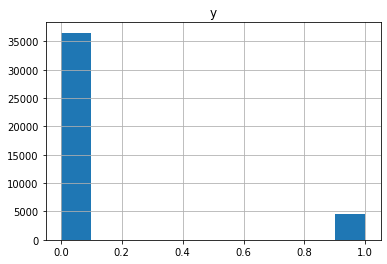

In [53]:
his_plot  = df_dummys.hist(column="y")

In [56]:
y_df = df_dummys["y"]
x_df = df_dummys.drop(['y'], axis=1, inplace=False)
x_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [57]:
X= x_df
y = y_df

In [37]:
#y.values
#y_df['id'] = range(1, len(df_copy) + 1)

In [61]:
dummy_cfire = DummyClassifier(strategy='stratified')
dummy_cfire.fit(X, y)
print("Dummy ACC: %.2f" % acc(y, dummy_cfire.predict(X)))

Dummy ACC: 0.80


In [154]:
train_x, test_x,train_y, test_y = train_test_split(X, y, test_size= .2, random_state= 60, stratify =y)
#train_x2, val = train_test_split(train_x)


In [155]:
rmodel = RandomForestClassifier(n_estimators=100, max_depth= 3)
model = cross_val_score(rmodel, train_x, train_y, scoring= 'f1_weighted', cv=10)
print(model)

[0.86562557 0.87047828 0.85995103 0.87242399 0.86713663 0.86729043
 0.86621648 0.86707622 0.86845752 0.86297632]


In [69]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


In [156]:
rmodel = RandomForestClassifier(n_estimators=100, max_depth= 12)
RandomFR = rmodel.fit(train_x, train_y)

In [157]:
RandomFR

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [158]:
predictx = RandomFR.predict(test_x)

In [159]:
print("Accuracy:", classification_report(test_y, predictx ))

Accuracy:               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.70      0.32      0.44       928

    accuracy                           0.91      8238
   macro avg       0.81      0.65      0.70      8238
weighted avg       0.90      0.91      0.89      8238



In [79]:
clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
scores = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(acc))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.83 +/- 0.11


In [80]:
clf = ExtraTreesClassifier(n_estimators=20000, max_depth=4)
clf.fit(X, y)
print("ExtraTrees ACC = %.2f" % acc(y, clf.predict(X)))

ExtraTrees ACC = 0.90


In [145]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1 , features[indices[f]],  importances[indices[f]] ))
    

[ 3 62  9  8  5  1 61  7 50  6 51 43 53 44  4 54 60 34 35  0 15 45 49 11
 18 48 47 52 46 56 28 32 24  2 23 58 17 57 59 29 21 33 55 10 26 40 12 19
 22 16 31 42 27 37 39 38 41 13 20 14 25 30 36]
Feature ranking:
1. education (0.171512)


IndexError: list index out of range

In [106]:
#X.values